In [10]:
%matplotlib inline

In [1]:
from planet4 import io, markings

In [4]:
db = io.DBManager()

In [5]:
img_name = 'ESP_021605_0985'
data = db.get_image_name_markings(img_name)

In [6]:
image_ids = data.image_id.unique()

In [7]:
def show_image_id(i):
    p4id = markings.ImageID(image_ids[i])
    p4id.plot_all()

In [8]:
from ipywidgets import interact

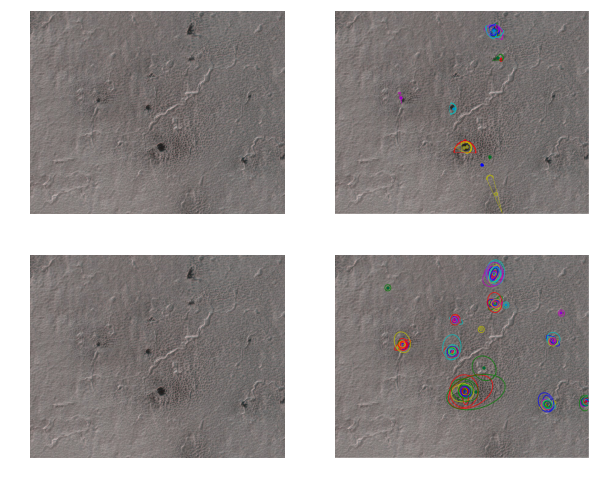

In [11]:
interact(show_image_id, i=(0, len(image_ids)-1))

In [12]:
img_id = image_ids[177]

In [13]:
img_id

'APF0000km4'

In [168]:
blotchfname = '/Users/klay6683/Dropbox/data/planet4/inca_p4id_APF0000km4/'+img_id+'_blotches.hdf'

In [151]:
pd.read_hdf(blotchfname)

,x,y,angle,radius_1,radius_2,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y
0,31.3125,540.03125,116.232091,19.915889,15.429009,22.509511,540.167418,40.115489,539.895082,17.47251,533.2115,45.15249,546.851


In [169]:
def get_blotch_list():
    return [markings.Blotch(row) for _,row in 
            pd.read_hdf(blotchfname).iterrows()]

In [170]:
fanfname = '/Users/klay6683/Dropbox/data/planet4/inca_p4id_APF0000km4/'+img_id+'_fans.hdf'

In [154]:
pd.read_hdf(fanfname)

,x,y,angle,spread,distance,arm1_x,arm1_y,arm2_x,arm2_y
0,34.4375,390.5,113.240589,42.038765,49.069339,32.965672,428.446632,7.934059,417.697072


In [171]:
fnotchfname = '/Users/klay6683/Dropbox/data/planet4/inca_p4id_APF0000km4/'+img_id+"_fnotches.hdf"

In [156]:
pd.read_hdf(fnotchfname)

,fan_x,fan_y,fan_angle,fan_spread,fan_distance,fan_arm1_x,fan_arm1_y,fan_arm2_x,fan_arm2_y,blotch_x,...,blotch_radius_2,blotch_p1_x,blotch_p1_y,blotch_p2_x,blotch_p2_y,blotch_p3_x,blotch_p3_y,blotch_p4_x,blotch_p4_y,fnotch_value
0,34.4375,390.5,113.240589,42.038765,49.069339,32.965672,428.446632,7.934059,417.697072,26.772727,...,15.864958,21.250202,416.708625,32.295253,407.109557,11.3441,408.213911,42.201354,415.604271,0.421053


In [172]:
def get_fan_list():
    return [markings.Fan(row) for _, row in pd.read_hdf(fanfname).iterrows()]

In [173]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


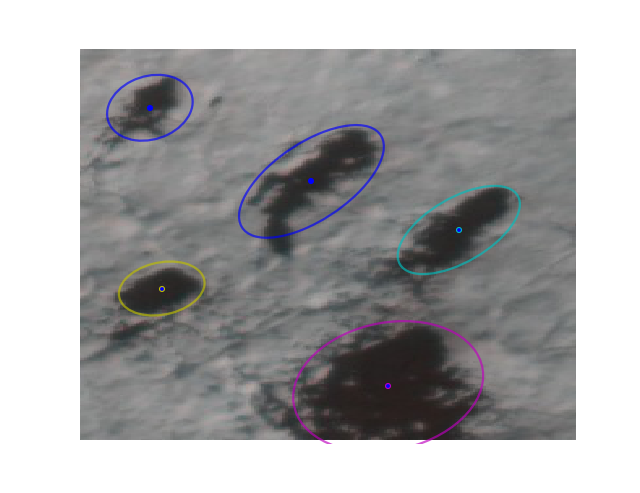

In [189]:
p4id.plot_blotches(blotches=get_blotch_list())
plt.savefig("/Users/klay6683/Desktop/blotches_clustered.pdf")
plt.xlim(0,190)
plt.ylim(650, 370)
plt.savefig("/Users/klay6683/Desktop/blotches_clustered_zoomed.pdf")

<IPython.core.display.Javascript object>


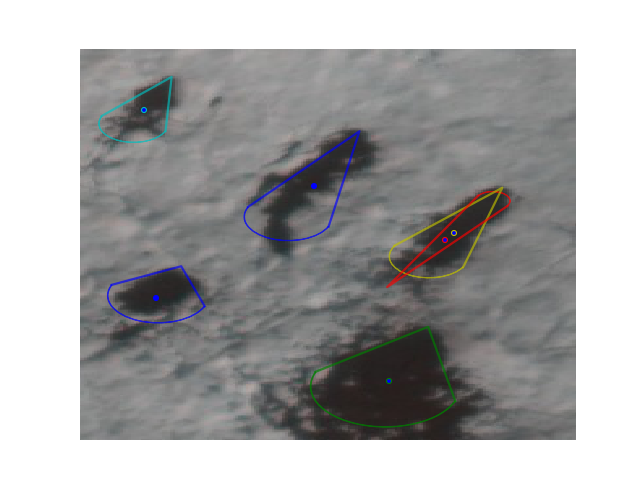

In [190]:
p4id.plot_fans(fans=get_fan_list())
plt.savefig("/Users/klay6683/Desktop/fans_clustered.pdf")
plt.xlim(0,190)
plt.ylim(650, 370)
plt.savefig("/Users/klay6683/Desktop/fans_clustered_zoomed.pdf")

<IPython.core.display.Javascript object>


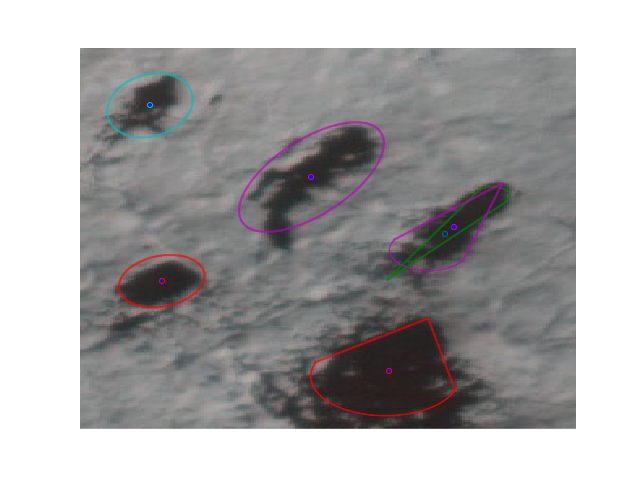

In [192]:
fig, ax = plt.subplots()
p4id.plot_blotches(ax=ax, blotches=get_blotch_list())
p4id.plot_fans(ax=ax, fans=get_fan_list())
plt.savefig("/Users/klay6683/Desktop/combined_fnotched.pdf")
plt.xlim(0,190)
plt.ylim(650, 370)
plt.savefig("/Users/klay6683/Desktop/combined_fnotched_zoomed.pdf")


In [138]:
a = (26.8, 412)

In [142]:
b = np.array((24.2, 414.2))

In [140]:
from numpy.linalg import norm

In [143]:
norm(a-b)

3.4058772731852742

In [49]:
s = pd.read_clipboard(index_col=0, header=None, squeeze=True)

In [52]:
b = markings.Blotch(s)

In [53]:
b.p1

array([ 494.97123289,   86.48759953])